## What is the best neighborhood in Pittsburgh?

Here, we will measure the best neighborhood in Pittsburgh based on 3 factors - crime rates, natural things, and non-emergent calls.

## Crime
By Oliver Gladys

I found that the crime dataset is an important dataset in determining whether a neighborhood is the best in Pittsburgh or not since less crime usually means a neighborhood is safer to live in.  This dataset has 95 neighborhoods in Pittsburgh but I plan to divide them into chunks of 30 to clearly inspect the data.  To start I read in the file and tally how many crimes have been recorded for each neighborhood.

In [5]:
import pandas as pd
crime_graph = pd.read_csv("Datasets/crime.csv")
#crime_graph.set_index("INCIDENTNEIGHBORHOOD")
places = crime_graph["INCIDENTNEIGHBORHOOD"].value_counts()
Neighborhoods = crime_graph["INCIDENTNEIGHBORHOOD"].tolist()
order = places.sort_values(ascending=True)
places

Central Business District    194
Carrick                      148
South Side Flats             112
Brookline                    102
East Liberty                  93
                            ... 
Mount Oliver                   2
Allegheny West                 2
Outside County                 2
Summer Hill                    2
Mt. Oliver Boro                1
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

I now plot all of the neighborhoods and their tallied crimes into a bar graph.  I also print out the total number of crimes and the number needed to calculate the top 30 neighborhoods with the least amount of crime tallied.

3165
65


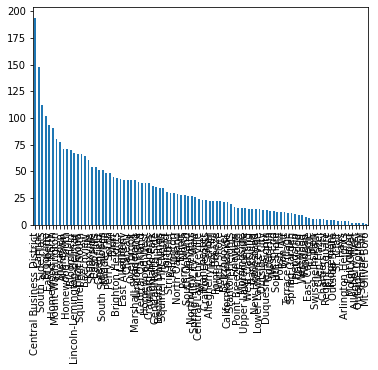

In [6]:
total =  len(crime_graph["INCIDENTNEIGHBORHOOD"].unique())
Offenses = crime_graph["OFFENSES"].count()
places = places.head(total)
places.plot.bar()
print(Offenses)
print(total - 30)

The graph was unclear since there were too many neighborhoods so I decided to take the 30 neighborhoods with the least amount of crime and place that in a bar graph.

NameError: name 'plot' is not defined

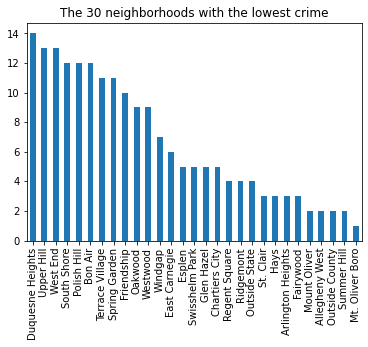

In [7]:
condensed_bottom = places.iloc[65:]
condensed_bottom.plot.bar( title="The 30 neighborhoods with the lowest crime") 
plot.show(block=True)

Now I take the 30 neighborhoods with the most amount of crime and place it in a bar graph.

In [ ]:
#crimes_commited = crime_graph.set_index("INCIDENTNEIGHBORHOOD")
#specific_crimes = crimes_commited["OFFENSES"]
#specific_crimes
condensed_top = places.head(30)
condensed_top.plot.bar( title="The 30 neighborhoods with the highest crime") 
plot.show(block=True)

Now I take the mean of the tallied crimes for the top 30 and bottom 30.

In [ ]:
mean_bottom = condensed_bottom.mean()
print(mean_bottom)
mean_top = condensed_top.mean()
print(mean_top)

Now I graph the average crime for the top 30 neighborhoods compared to the bottom 30 neighborhoods.

In [ ]:
import matplotlib.pyplot as plot

data = {"Means":["Top Half", "Bottom Half"],

        "Average Crime":[mean_top, mean_bottom]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Means", y="Average Crime", title="Comparing Means of the top 30 vs the bottom 30");

plot.show(block=True);

Final rankings for the best neighborhoods in terms of amount of crime:

In [ ]:
#order[[]]
#for i in range(90):
   # order[i].append(Neighborhoods[i])
    #order[i].append(i)
    #order.insert(i+1, [])
order.iloc[0:30]

In [59]:
crimeranking = [[]]
for i in range(len(order)):
    crimeranking[i].append(Neighborhoods[i])
    crimeranking[i].append(i+1)
    crimeranking.insert(i+1, [])


crimerankingdf = pd.DataFrame(crimeranking, columns=['Neighborhood', 'Crime Ranking'])
crimerankingdf

,Neighborhood,Crime Ranking
0,Brookline,1.0
1,North Oakland,2.0
2,Sheraden,3.0
3,Bloomfield,4.0
4,Central Business District,5.0
...,...,...
90,Central Business District,91.0
91,Regent Square,92.0
92,Brighton Heights,93.0
93,East Liberty,94.0


## Crime Conclusion  

According to this dataset on crime the best neighborhood is Mt. Oliver Boro because it has the least amount of recorded crime out of all the neighborhoods with only 1.  There were many neighborhoods that were also worthy but they had slightly more crime than Mt. Oliver Boro.  The top 30 neighborhoods with the most crime had a significantly higher average for amount of crime than the bottom 30 which I found surprising that it was that big of a gap.  Overall any of the top 30 neighborhoods for crime I find worthy of being the best neighborhoods because less crime usually equates to better safety.

## Nature
By Radley Lettich

Obviously, nature is an important thing to stick close to. In a large city, however, we struggle with this. Which neighborhoods have the most trees, and which neighborhoods have the most water features? Obviously we can't just count, so what would be a little more representative of how many trees are in each neighborhood?

In [9]:
# Load the cool stuff
import pandas as pd
import numpy as np

In [10]:
# Create a dataframe for each of the three datasets (neighborhoods, water, and trees)
neighborhood = pd.read_csv("Datasets/Neighborhoods_.csv")
w = pd.read_csv("Datasets/WaterFeatures_.csv").dropna()
t = pd.read_csv("Datasets/Trees_.csv").dropna()

# Make a reduced dataframe of the neighborhood dataset that only contains the square mileage for each community.
# We sort the values now, as we can't sort them while putting them into a list (or at least I don't know how to)
n = neighborhood[['hood','sqmiles']].sort_values('hood')

# Make a list of the neighborhoods, in alphabetical order. We'll use alphabetical order to organize everything.
nbhood = n['hood'].unique().tolist()
sqrmiles = n['sqmiles'].tolist()

# The dataset had a 0 for neighborhood 60 (Perry North), so I filled it in manually here because we cannot divide by zero.
sqrmiles[60] = 1.212

# Make two empty lists, which  we'll fill with the counts of each communities' counts.
treesum = []
watersum = []

# Fill 'em up so they've got space
for r in range(90) :
    treesum.append(0)
    watersum.append(0)

# Here, we loop through the length of the trees dataset, and find the neighborhood for each tree.
# Once we know the neighborhood, we find it's spot in the treesum list relative to where the neighborhood is in the nbhood list.
# After that, we just tick that spot up by one. We just counted one tree! Do it about 45000 more times.
for r in range(len(t)):
    neighborhood = t.iloc[r,48]
    i = nbhood.index(neighborhood)
    treesum[i]+=1

# Aaaaaaaaaaand do it again, but with water features this time!
for r in range(len(w)):
    neighborhood = w.iloc[r,7]
    i = nbhood.index(neighborhood)
    watersum[i]+=1

# Now that we've got everything prepared, we're gonna loop to make these lists into a 2D array. Making sure we add...
num = [[]]
for i in range(90):
    num[i].append(nbhood[i]) # the neighborhood name,
    num[i].append(treesum[i] / sqrmiles[i]) # the density of trees (no. of trees / sqrmiles),
    num[i].append(watersum[i] / sqrmiles[i]) # the density of water features,
    num[i].append((treesum[i] + (watersum[i] * 5)) / sqrmiles[i]) # and the sum of them, which will be used for comparison.
    
    num.insert(i+1, []) # Make yo'self a new line.

# The loop ends after it creates a new line, we're just gonna get rid of it.
del num[90]

# Now, the piece de resistance, let's make it into a dataframe!
stats = pd.DataFrame(num, columns=['Neighborhood', 'Tree Density', 'Water Density', 'Total'])

# I looked at it and it looked like a mathematician threw up on a calculator, so let's round it to clean it up.
cleanstats = stats.round(decimals=2)

# Let's sort this bad boy, and see what we got!
cleanstatsbutsorted = cleanstats.sort_values('Total', ascending=False)
cleanstatsbutsorted

c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Neighborhood,Tree Density,Water Density,Total
33,Friendship,2867.92,0.00,2867.92
18,Central Northside,2335.91,3.86,2355.21
28,East Liberty,2127.37,3.44,2144.58
48,Manchester,2064.52,7.17,2100.36
49,Marshall-Shadeland,1813.85,8.66,1857.14
...,...,...,...,...
26,East Carnegie,9.26,0.00,9.26
30,Esplen,8.70,0.00,8.70
70,South Shore,4.72,0.00,4.72
35,Glen Hazel,4.39,0.00,4.39


In [11]:
# Let's make it into a ranking! Start by taking the now sorted neighborhood column as a list, like we did at the start.
howdyneighborino = cleanstatsbutsorted['Neighborhood'].tolist()

# A similar system for loading up a 2D array, but we only need the two values, which just so happen to align with i nicely.
ranking = [[]]
for i in range(90):
    ranking[i].append(howdyneighborino[i])
    ranking[i].append(i+1)
    ranking.insert(i+1, [])
del ranking[90]

# Let's take a look!
rankingdf = pd.DataFrame(ranking, columns=['Neighborhood', 'Nature Ranking'])
rankingdf

,Neighborhood,Nature Ranking
0,Friendship,1
1,Central Northside,2
2,East Liberty,3
3,Manchester,4
4,Marshall-Shadeland,5
...,...,...
85,East Carnegie,86
86,Esplen,87
87,South Shore,88
88,Glen Hazel,89


# Nature Conclusion

I, personally, like to be close to nature. I have a tree right outside my window. Due to the power of math, we were able to determine the density of trees and water in differing communities in Pittsburgh, and compare them. By calculating the number of trees and water features in each respective community, we were able to divide it by the square mileage to get something that was a little more representative. In the end, I concluded that the most natural community in Pittsburgh is **Friendship.**

# 311 (Non-Emergent) Calls Dataset
## Alvyn Berg

The 311 requests are non-emergent requests about pretty much anything Pittsburgh's civil servants/government workers
are authorized to handle. Requests about things Pittsburgh's civil service departments are not authorized, equipped, or
otherwise able to handle are directed to appropriate third parties, a.k.a. directed elsewhere. Let's check out our 311
dataset, which I am calling 'non_emergent'.


In [13]:

import pandas as pd
try:
    non_emergent_complete = pd.read_csv("Datasets/311data.csv")
    non_emergent_definitions = pd.read_csv("Datasets/311definitions.csv")
    non_emergent_codebook = pd.read_csv("Datasets/311-codebook.csv")
except FileNotFoundError:
    print("Error: File Not Found")

In [14]:
non_emergent_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495580 entries, 0 to 495579
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   REQUEST_ID             495579 non-null  float64
 1   CREATED_ON             495580 non-null  object 
 2   REQUEST_TYPE           495580 non-null  object 
 3   REQUEST_ORIGIN         495580 non-null  object 
 4   STATUS                 495580 non-null  int64  
 5   DEPARTMENT             491255 non-null  object 
 6   NEIGHBORHOOD           455165 non-null  object 
 7   COUNCIL_DISTRICT       455867 non-null  float64
 8   WARD                   455306 non-null  float64
 9   TRACT                  456706 non-null  float64
 10  PUBLIC_WORKS_DIVISION  455306 non-null  float64
 11  PLI_DIVISION           455306 non-null  float64
 12  POLICE_ZONE            455079 non-null  float64
 13  FIRE_ZONE              455478 non-null  object 
 14  X                      459607 non-nu

In [15]:
non_emergent_complete.head(5)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
1,200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
2,201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
3,200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
4,193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT


We can see this dataset contains several columns, only a few of which I will work directly with. Since we care about
requests only at the neighborhood level, I will take only the relevant subset of columns to work with. Most columns
names are self-explanatory. Request_Id is unnecessary for me, as are columns 7 through 16.

In [16]:
non_emergent = non_emergent_complete.iloc[:, 1:7]
non_emergent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495580 entries, 0 to 495579
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CREATED_ON      495580 non-null  object
 1   REQUEST_TYPE    495580 non-null  object
 2   REQUEST_ORIGIN  495580 non-null  object
 3   STATUS          495580 non-null  int64 
 4   DEPARTMENT      491255 non-null  object
 5   NEIGHBORHOOD    455165 non-null  object
dtypes: int64(1), object(5)
memory usage: 22.7+ MB


We now have concise data to work with.

In [18]:
non_emergent.head(5)

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD
0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside
1,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats
2,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill
3,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville
4,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills


The applicable date range for this dataset is from 2015 to 2021

In [19]:
non_emergent.CREATED_ON.min()

'2015-02-20T09:53:00'

In [20]:
non_emergent.CREATED_ON.max()

'2021-04-08T08:14:00'

Let's see what departments there are.


In [22]:
non_emergent.DEPARTMENT.value_counts()

DPW - Street Maintenance                              121436
Permits, Licenses and Inspections                     104813
DPW - Refuse                                           41037
311                                                    33192
Police - Zones 1-6                                     28481
DOMI - Permits                                         22086
Pittsburgh Water and Sewer Authority                   18452
DOMI - TrafficShop                                     16895
Police - AVU                                           14887
Animal Care & Control                                  13657
DPW - Forestry Division                                13081
DOMI - Traffic                                         11412
Allegheny City Electric                                 9174
DOMI - Asphalt                                          8647
City Source Associates, Inc.                            5936
DPW - Park Maintenance                                  4911
DPW - Construction Divis

A good neighborhood needs to have good streets so let's see which neighborhoods had the lowest number of street
maintenance calls.

In [129]:
dn = non_emergent.groupby('DEPARTMENT')['NEIGHBORHOOD']
streetMaintenanceRanking = dn.get_group("DPW - Street Maintenance").value_counts().rank()
streetMaintenanceRanking = streetMaintenanceRanking.sort_values(ascending=True)
streetRankingList = streetMaintenanceRanking.index.to_list()
streetMaintenanceRankingDF = pd.DataFrame({"Neighborhood":streetRankingList, "Street Maintenance Ranking":range(1, 92)})
streetMaintenanceRankingDF

,Neighborhood,Street Maintenance Ranking
0,Mount Oliver Borough,1
1,Arlington Heights,2
2,Glen Hazel,3
3,East Carnegie,4
4,Chartiers City,5
...,...,...
86,South Side Slopes,87
87,Bloomfield,88
88,Squirrel Hill South,89
89,Carrick,90


We can conclude that based on the lowest street maintenance metric that the best neighborhood is Mount Oliver Borough.

# Final Calculation

In [130]:
final = pd.merge(crimerankingdf, rankingdf)
final = pd.merge(final, streetMaintenanceRankingDF)
final["sum"] = final.sum(axis=1)
final = final.sort_values('sum')
final.head(5)

,Neighborhood,Crime Ranking,Nature Ranking,Street Maintenance Ranking,sum
68,Friendship,44.0,1,22,67.0
67,North Shore,43.0,15,17,75.0
7,North Oakland,2.0,19,57,78.0
14,Central Business District,5.0,11,65,81.0
57,East Allegheny,33.0,13,37,83.0


# Conclusion
With the lowest ranking sum, through Crime, Nature, and Emergent Calls, we find that the best neighborhood is Friendship.